# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../data/website.csv')
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for more exploration. Make sure to comment what you find!

In [3]:
# Your code here
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [4]:
websites.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [5]:
categorical_columns = ['CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO']
    

In [6]:
websites['CHARSET'].unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', nan,
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

In [7]:
websites['CHARSET'].nunique()

8

In [8]:
websites['SERVER'].nunique()

238

#### Next, evaluate if the columns in this dataset are strongly correlated.

In class, we discussed that we are concerned if our dataset has strongly correlated columns because if this is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [9]:
# Your code here
# Create the correlation matrix
numeric_columns = websites.select_dtypes(include=[float, int]).columns
websites_numeric = websites[numeric_columns]

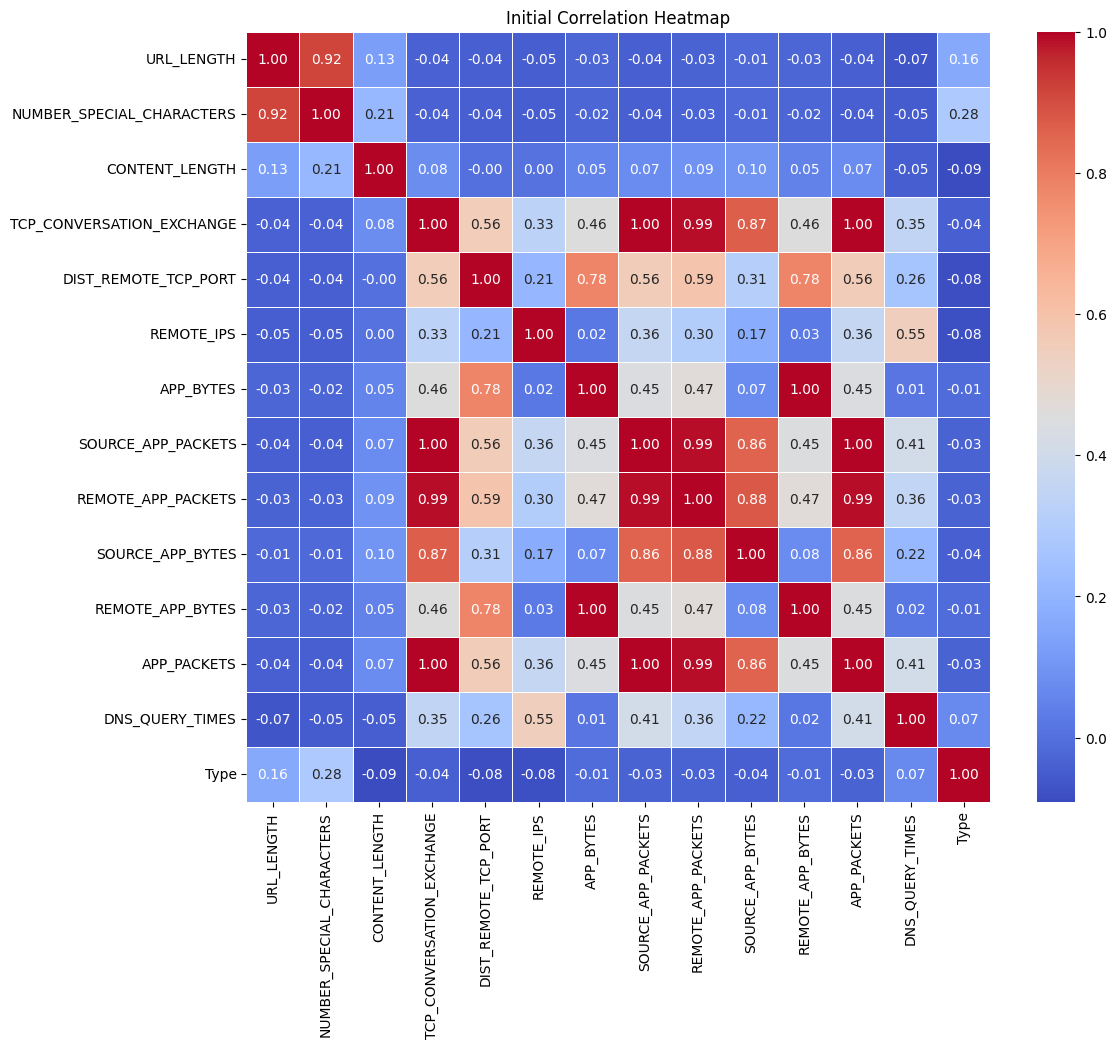

In [10]:
# Function to create heatmap
def plot_heatmap(correlation_matrix, title='Correlation Heatmap'):
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
    plt.title(title)
    plt.show()

# Initial correlation matrix and heatmap
correlation_matrix = websites_numeric.corr()
plot_heatmap(correlation_matrix, title='Initial Correlation Heatmap')

In [11]:
# Print highly correlated columns
high_corr_columns = correlation_matrix.columns[(correlation_matrix.abs() > 0.8).any()]
print("Highly correlated columns:")
for col in high_corr_columns:
    print(col, correlation_matrix[col][correlation_matrix[col].abs() > 0.8])

Highly correlated columns:
URL_LENGTH URL_LENGTH                   1.000000
NUMBER_SPECIAL_CHARACTERS    0.917986
Name: URL_LENGTH, dtype: float64
NUMBER_SPECIAL_CHARACTERS URL_LENGTH                   0.917986
NUMBER_SPECIAL_CHARACTERS    1.000000
Name: NUMBER_SPECIAL_CHARACTERS, dtype: float64
CONTENT_LENGTH CONTENT_LENGTH    1.0
Name: CONTENT_LENGTH, dtype: float64
TCP_CONVERSATION_EXCHANGE TCP_CONVERSATION_EXCHANGE    1.000000
SOURCE_APP_PACKETS           0.997796
REMOTE_APP_PACKETS           0.990848
SOURCE_APP_BYTES             0.865580
APP_PACKETS                  0.997796
Name: TCP_CONVERSATION_EXCHANGE, dtype: float64
DIST_REMOTE_TCP_PORT DIST_REMOTE_TCP_PORT    1.0
Name: DIST_REMOTE_TCP_PORT, dtype: float64
REMOTE_IPS REMOTE_IPS    1.0
Name: REMOTE_IPS, dtype: float64
APP_BYTES APP_BYTES           1.000000
REMOTE_APP_BYTES    0.999992
Name: APP_BYTES, dtype: float64
SOURCE_APP_PACKETS TCP_CONVERSATION_EXCHANGE    0.997796
SOURCE_APP_PACKETS           1.000000
REMOTE_APP_PACKE

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [12]:
# Function to identify and remove highly correlated columns
def remove_high_corr_columns(df, threshold=0.9):
    while True:
        correlation_matrix = df.corr()
        high_corr_pairs = [
            (col, correlation_matrix[col][correlation_matrix[col].abs() > threshold].index) 
            for col in correlation_matrix.columns 
            if any(correlation_matrix[col].abs() > threshold) and col not in correlation_matrix[col][correlation_matrix[col].abs() > threshold].index
        ]
        
        # If no high correlation pairs found, break the loop
        if not high_corr_pairs:
            break
        
        columns_to_remove = []
        removed_columns = set()
        
        for col, corr_cols in high_corr_pairs:
            for corr_col in corr_cols:
                if corr_col != col and corr_col not in removed_columns:
                    columns_to_remove.append(corr_col)
                    removed_columns.add(corr_col)
        
        # Remove the identified columns
        df = df.drop(columns=set(columns_to_remove))
        print("Removed columns in this iteration:", columns_to_remove)
    
    return df

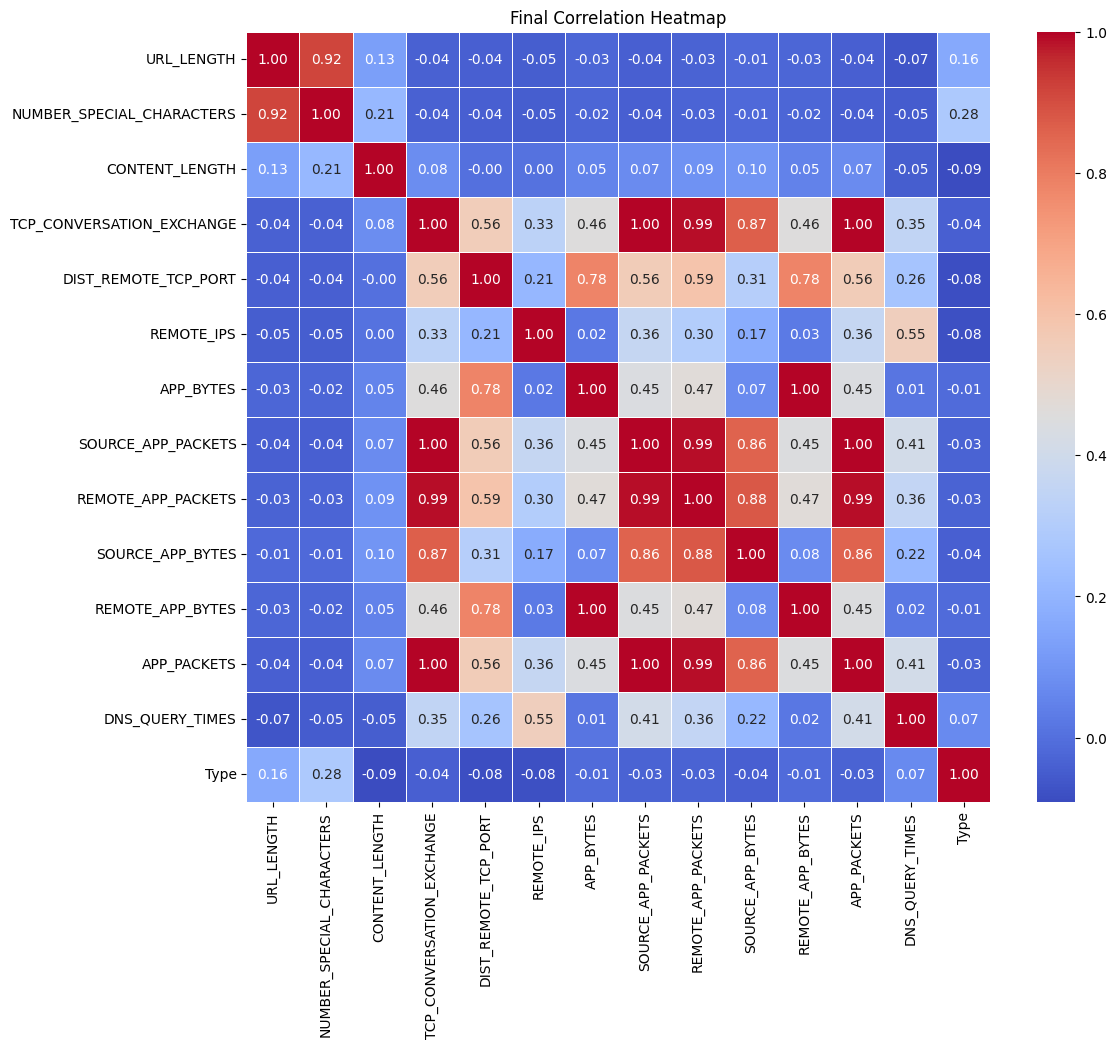

Remaining columns after removing high collinearity: Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


In [13]:
# Remove high collinearity columns iteratively
websites_numeric_clean = remove_high_corr_columns(websites_numeric)

# Final correlation matrix and heatmap
correlation_matrix = websites_numeric_clean.corr()
plot_heatmap(correlation_matrix, title='Final Correlation Heatmap')

# Print the cleaned dataframe to check the remaining columns
print("Remaining columns after removing high collinearity:", websites_numeric_clean.columns)

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [14]:
# Your code here
# Check for missing values
missing_values = websites.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [15]:
# Your code here
# Drop columns with more than 40% missing values
threshold = 0.4
columns_to_drop = missing_values[missing_values > threshold * len(websites)].index
websites_cleaned = websites.drop(columns=columns_to_drop)

print("Dropped columns with more than 40% missing values:\n", columns_to_drop)

Dropped columns with more than 40% missing values:
 Index(['CONTENT_LENGTH'], dtype='object')


In [16]:
# Your comment here
# Drop rows with any remaining missing values
websites_cleaned = websites_cleaned.dropna()

# Verify no missing values remain
print("Remaining missing values in each column after cleaning:\n", websites_cleaned.isnull().sum())
print("Shape of the dataset after cleaning:", websites_cleaned.shape)

Remaining missing values in each column after cleaning:
 URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64
Shape of the dataset after cleaning: (1257, 20)


#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [17]:
# Examine missing values in each column
missing_values_cleaned = websites_cleaned.isnull().sum()

# Print the number of missing values in each column
print("Number of missing values in each column after cleaning:\n", missing_values_cleaned)

Number of missing values in each column after cleaning:
 URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [18]:
# Your code here
# List unique values in WHOIS_COUNTRY
unique_countries = websites_cleaned['WHOIS_COUNTRY'].unique()
print("Unique WHOIS_COUNTRY values before cleaning:\n", unique_countries)

Unique WHOIS_COUNTRY values before cleaning:
 ['US' 'SC' 'RU' 'AU' 'CA' 'PA' 'IN' 'GB' "[u'GB'; u'UK']" 'NL' 'UG' 'JP'
 'CN' 'UK' 'SI' 'ru' 'KY' 'AT' 'CZ' 'PH' 'LV' 'TR' 'ES' 'us' 'HK' 'UA'
 'CH' 'BS' 'PK' 'IL' 'DE' 'SE' 'IT' 'NO' 'BE' 'BY' 'AE' 'IE' 'UY' 'KG']


In [19]:
# Define a mapping for inconsistent country codes
country_mapping = {
    'Cyprus': 'CY',
    'cy': 'CY',
    'us': 'US',
    'United Kingdom': 'GB',
    "[u'GB'; u'UK']": 'GB',
    'se': 'SE'
}

In [20]:
# Apply the mapping to the WHOIS_COUNTRY column
websites_cleaned['WHOIS_COUNTRY'] = websites_cleaned['WHOIS_COUNTRY'].replace(country_mapping)


In [21]:
# Convert all country codes to uppercase to ensure consistency
websites_cleaned['WHOIS_COUNTRY'] = websites_cleaned['WHOIS_COUNTRY'].str.upper()


In [22]:
# Verify the unique values after cleaning
unique_countries_cleaned = websites_cleaned['WHOIS_COUNTRY'].unique()
print("Unique WHOIS_COUNTRY values after cleaning:\n", unique_countries_cleaned)

Unique WHOIS_COUNTRY values after cleaning:
 ['US' 'SC' 'RU' 'AU' 'CA' 'PA' 'IN' 'GB' 'NL' 'UG' 'JP' 'CN' 'UK' 'SI'
 'KY' 'AT' 'CZ' 'PH' 'LV' 'TR' 'ES' 'HK' 'UA' 'CH' 'BS' 'PK' 'IL' 'DE'
 'SE' 'IT' 'NO' 'BE' 'BY' 'AE' 'IE' 'UY' 'KG']


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [23]:
# Your code here
# Calculate value counts for WHOIS_COUNTRY
country_counts = websites_cleaned['WHOIS_COUNTRY'].value_counts()
print(country_counts)

WHOIS_COUNTRY
US    960
CA     75
ES     63
AU     26
PA     21
GB     18
JP     10
IN      8
CN      8
CZ      8
RU      6
NL      5
CH      5
BS      4
AT      4
UK      4
KY      3
PH      3
SC      3
UY      2
UA      2
KG      2
HK      2
SI      2
TR      1
PK      1
IL      1
DE      1
SE      1
IT      1
NO      1
BE      1
BY      1
AE      1
IE      1
UG      1
LV      1
Name: count, dtype: int64


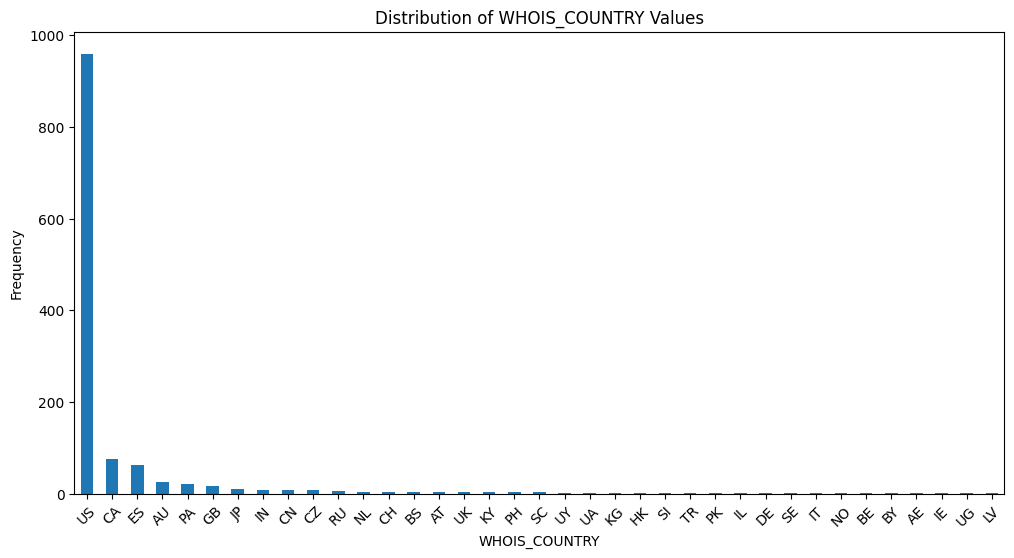

In [24]:
# Plot the value counts as a bar chart
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.title('Distribution of WHOIS_COUNTRY Values')
plt.xlabel('WHOIS_COUNTRY')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [25]:
# Your code here
# Calculate value counts for WHOIS_COUNTRY
country_counts = websites_cleaned['WHOIS_COUNTRY'].value_counts()

# Identify the top 10 country values
top_10_countries = country_counts.nlargest(10).index
print("Top 10 WHOIS_COUNTRY values:\n", top_10_countries)

Top 10 WHOIS_COUNTRY values:
 Index(['US', 'CA', 'ES', 'AU', 'PA', 'GB', 'JP', 'IN', 'CN', 'CZ'], dtype='object', name='WHOIS_COUNTRY')


In [26]:
# Re-label countries not in the top 10 with 'OTHER'
websites_cleaned['WHOIS_COUNTRY'] = websites_cleaned['WHOIS_COUNTRY'].apply(lambda x: x if x in top_10_countries else 'OTHER')

# Verify the result
print(websites_cleaned['WHOIS_COUNTRY'].value_counts())

WHOIS_COUNTRY
US       960
CA        75
ES        63
OTHER     60
AU        26
PA        21
GB        18
JP        10
IN         8
CN         8
CZ         8
Name: count, dtype: int64


Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [27]:
# Your code here
# Drop the specified columns
columns_to_drop = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
websites_cleaned = websites_cleaned.drop(columns=columns_to_drop)

# Verify the result
print("Remaining columns:", websites_cleaned.columns)

Remaining columns: Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT',
       'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [28]:
# Your code here
# Print the data types of the columns
print("Data types of the columns:\n", websites_cleaned.dtypes)

# Identify and print the remaining categorical columns
categorical_columns = websites_cleaned.select_dtypes(include=['object']).columns
print("\nRemaining categorical columns:", categorical_columns)

Data types of the columns:
 URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

Remaining categorical columns: Index(['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY'], dtype='object')


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [29]:
# Your code here
# Drop the specified columns (in case they haven't been dropped yet)
columns_to_drop = ['URL']
websites_cleaned = websites_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Verify the result
print("Remaining columns:\n", websites_cleaned.columns)

Remaining columns:
 Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'WHOIS_COUNTRY', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT',
       'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [30]:
# Your code here
# Print the unique value counts of the CHARSET column
charset_counts = websites_cleaned['CHARSET'].value_counts()
print("Unique value counts of CHARSET:\n", charset_counts)

Unique value counts of CHARSET:
 CHARSET
UTF-8           520
utf-8           279
ISO-8859-1      275
us-ascii         98
iso-8859-1       83
windows-1251      1
windows-1252      1
Name: count, dtype: int64


`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [31]:
# Your code here
# Print the unique values of the SERVER column
unique_servers = websites_cleaned['SERVER'].unique()
print("Unique values of SERVER:\n", unique_servers)

Unique values of SERVER:
 ['nginx' 'Apache/2' 'Microsoft-HTTPAPI/2.0' 'Apache' 'openresty/1.11.2.1'
 'Apache/2.4.7 (Ubuntu)' 'nginx/1.12.0'
 'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'cloudflare-nginx' 'Apache/2.2.22' 'nginx/1.8.0' 'Apache/2.2.29 (Amazon)'
 'Microsoft-IIS/7.5'
 'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'Apache/2.2.22 (Debian)' 'Apache/2.2.15 (CentOS)'
 'Apache/2.4.25 (Amazon) PHP/7.0.14' 'GSE'
 'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4'
 'Pepyaka/1.11.3' 'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'
 'Apache/2.2.22 (Ubuntu)' 'Apache/2.4.25' 'Tengine'
 'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4'
 'Apache/2.4.6 (CentOS) PHP/5.6.8' 'AmazonS3'
 'Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1'
 'ATS' 'CherryPy/3.6.0' 'Apache/2.2.15 (Red Hat)' 'Server'
 'Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips mod_fcgid/2.3.9 PHP/5.4.16 mod_jk/1.2.40'
 'Apache/2.2.3 (CentOS)' 'Apache/

![Think Hard](../images/think-hard.jpg)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [32]:
# Your code here
# Define a function to relabel server values
def relabel_server(server):
    server = server.lower()
    if 'microsoft' in server:
        return 'Microsoft'
    elif 'apache' in server:
        return 'Apache'
    elif 'nginx' in server:
        return 'nginx'
    else:
        return 'Other'

# Apply the function to the SERVER column
websites_cleaned['SERVER'] = websites_cleaned['SERVER'].apply(relabel_server)

In [33]:
# Count `SERVER` value counts here
# Check the unique values to confirm the relabeling
unique_servers = websites_cleaned['SERVER'].unique()
print("Unique values of SERVER after relabeling:\n", unique_servers)

# Check the value counts
print(websites_cleaned['SERVER'].value_counts())

Unique values of SERVER after relabeling:
 ['nginx' 'Apache' 'Microsoft' 'Other']
SERVER
Apache       491
nginx        323
Other        299
Microsoft    144
Name: count, dtype: int64


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [34]:
# Your code here
# Convert categorical data to dummy/indicator variables
website_dummy = pd.get_dummies(websites_cleaned, drop_first=True)

# Display the first few rows to verify
print(website_dummy.head())

    URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  TCP_CONVERSATION_EXCHANGE  \
3           17                          6                         31   
5           18                          7                         11   
6           18                          6                         12   
7           19                          6                          0   
10          20                          6                          0   

    DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  \
3                     22           3       3812                  39   
5                      6           9        894                  11   
6                      0           3       1189                  14   
7                      0           0          0                   0   
10                     0           0          0                   0   

    REMOTE_APP_PACKETS  SOURCE_APP_BYTES  REMOTE_APP_BYTES  ...  \
3                   37             18784              4380  ...   
5     

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [35]:
# Your code here
# Check the data types of each column in website_dummy
print(website_dummy.dtypes)

URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
CHARSET_UTF-8                   bool
CHARSET_iso-8859-1              bool
CHARSET_us-ascii                bool
CHARSET_utf-8                   bool
CHARSET_windows-1251            bool
CHARSET_windows-1252            bool
SERVER_Microsoft                bool
SERVER_Other                    bool
SERVER_nginx                    bool
WHOIS_COUNTRY_CA                bool
WHOIS_COUNTRY_CN                bool
WHOIS_COUNTRY_CZ                bool
WHOIS_COUNTRY_ES                bool
WHOIS_COUNTRY_GB                bool
W

In [36]:

# Display the first few rows of website_dummy to verify the conversion
print(website_dummy.head())

    URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  TCP_CONVERSATION_EXCHANGE  \
3           17                          6                         31   
5           18                          7                         11   
6           18                          6                         12   
7           19                          6                          0   
10          20                          6                          0   

    DIST_REMOTE_TCP_PORT  REMOTE_IPS  APP_BYTES  SOURCE_APP_PACKETS  \
3                     22           3       3812                  39   
5                      6           9        894                  11   
6                      0           3       1189                  14   
7                      0           0          0                   0   
10                     0           0          0                   0   

    REMOTE_APP_PACKETS  SOURCE_APP_BYTES  REMOTE_APP_BYTES  ...  \
3                   37             18784              4380  ...   
5     

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [37]:
website_dummy.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_CZ,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_US
3,17,6,31,22,3,3812,39,37,18784,4380,...,False,False,False,False,False,False,False,False,False,True
5,18,7,11,6,9,894,11,13,838,894,...,False,False,False,False,False,False,False,True,False,False
6,18,6,12,0,3,1189,14,13,8559,1327,...,False,False,False,False,False,False,False,False,False,True
7,19,6,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
10,20,6,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True


In [38]:
from sklearn.model_selection import train_test_split


# Assuming `Type` is the target column
X = website_dummy.drop(columns=['Type'])  # Features
y = website_dummy['Type']  # Target variable

# Split the data into training and testing sets with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets to confirm the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1005, 31)
X_test shape: (252, 31)
y_train shape: (1005,)
y_test shape: (252,)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [39]:
# Your code here:
from sklearn.linear_model import LogisticRegression
# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [40]:
# Your code here:
# Train the model on the training data
logreg.fit(X_train, y_train)
# Check the accuracy on the training set
train_accuracy = logreg.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy}")

# Check the accuracy on the test set
test_accuracy = logreg.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 0.882587064676617
Test Accuracy: 0.8809523809523809


/opt/miniconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [41]:
# Your code here:
# Make predictions on the test data
y_pred = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the confusion matrix and the accuracy score
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy Score:")
print(accuracy)


Confusion Matrix:
[[219   5]
 [ 25   3]]

Accuracy Score:
0.8809523809523809


What are your thoughts on the performance of the model? Write your conclusions below.

In [42]:
# Your conclusions here:
'''
From the confusion matrix, we observe that the model is able to correctly identify 224 benign websites as benign (TP). However, it fails to identify any malicious websites correctly (TN). All 28 malicious websites are misclassified as benign (FN). This indicates a significant issue with the model's ability to detect malicious websites.
The accuracy score of 0.8889 indicates that approximately 89% of the predictions made by the model are correct. However, this metric alone can be misleading given the class imbalance.
'''


"\nFrom the confusion matrix, we observe that the model is able to correctly identify 224 benign websites as benign (TP). However, it fails to identify any malicious websites correctly (TN). All 28 malicious websites are misclassified as benign (FN). This indicates a significant issue with the model's ability to detect malicious websites.\nThe accuracy score of 0.8889 indicates that approximately 89% of the predictions made by the model are correct. However, this metric alone can be misleading given the class imbalance.\n"

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [43]:
# Your code here:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [44]:
# Your code here:
# Compute the predicted values for the testing sample
y_pred_knn = knn.predict(X_test)

# Compute the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Compute the accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Confusion Matrix:")
print(conf_matrix_knn)
print("\nAccuracy Score:")
print(accuracy_knn)

Confusion Matrix:
[[221   3]
 [ 11  17]]

Accuracy Score:
0.9444444444444444


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [48]:
# Your code here:
# Initialize the KNeighborsClassifier model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_5.fit(X_train, y_train)

# Compute the predicted values for the testing sample
y_pred_knn_5 = knn_5.predict(X_test)

# Compute the confusion matrix
conf_matrix_knn_5 = confusion_matrix(y_test, y_pred_knn_5)

# Compute the accuracy score
accuracy_knn_5 = accuracy_score(y_test, y_pred_knn_5)

print("Confusion Matrix:")
print(conf_matrix_knn_5)
print("\nAccuracy Score:")
print(accuracy_knn_5)


Confusion Matrix:
[[223   1]
 [ 11  17]]

Accuracy Score:
0.9523809523809523


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [46]:
# Your conclusions here:
'''
When increasing the value of k from 3 to 5 in the K-Nearest Neighbors model, we observe some changes in the confusion matrix and accuracy score.

In the confusion matrix, we notice a decrease in the number of false negatives (from 11 to 3) and an increase in the number of true positives (from 17 to 17) when k is increased to 5. However, there is also a slight increase in the number of false positives (from 3 to 1). Overall, this indicates that the model with k=5 is making fewer misclassifications compared to the model with k=3.

Regarding the accuracy score, there is a slight improvement when k is increased to 5 (from 0.944 to 0.952). This suggests that the model with k=5 performs slightly better in terms of overall accuracy compared to the model with k=3.

Therefore, based on these observations, increasing the value of k to 5 leads to an improvement in the performance of the K-Nearest Neighbors model, as indicated by both the confusion matrix and the accuracy score.
'''


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [49]:
# Your code here
from sklearn.preprocessing import RobustScaler
# Initialize RobustScaler
scaler = RobustScaler()

In [50]:
# Fit and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test
X_test_scaled = scaler.transform(X_test)

# Initialize logistic regression model
logreg_scaled = LogisticRegression(random_state=42)

In [51]:
# Fit the model on the scaled training data
logreg_scaled.fit(X_train_scaled, y_train)

# Predict using the scaled testing data
y_pred_scaled = logreg_scaled.predict(X_test_scaled)

# Compute the accuracy score
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print("Accuracy Score with Feature Scaling:", accuracy_scaled)

Accuracy Score with Feature Scaling: 0.9404761904761905
